In [20]:
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plot
import numpy as np
import pandas as pd
%matplotlib inline

In [21]:
start = datetime.datetime(2014,1,1)
end = datetime.datetime(2020,8,28)

In [22]:
boeing = web.DataReader("BA", 'yahoo', start, end)

In [23]:
boeing.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,137.250000,135.509995,136.009995,136.669998,3366700.0,115.912590
2014-01-03,138.500000,137.050003,137.059998,137.619995,3177400.0,116.718285
2014-01-06,139.759995,137.800003,139.399994,138.410004,4196500.0,117.388313
2014-01-07,141.100006,138.500000,138.580002,140.509995,4238500.0,119.169350
2014-01-08,141.399994,139.360001,140.690002,140.820007,4236100.0,119.432281


In [24]:
airbus = web.DataReader("EADSY", 'yahoo', start, end)
airbus.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,19.330000,19.200001,19.240000,19.309999,48300.0,16.786625
2014-01-03,19.250000,19.080000,19.250000,19.080000,37700.0,16.586683
2014-01-06,19.100000,18.850000,19.070000,18.879999,55000.0,16.412817
2014-01-07,19.070000,18.830000,18.860001,19.000000,144700.0,16.517136
2014-01-08,18.799999,18.650000,18.799999,18.750000,65100.0,16.299807


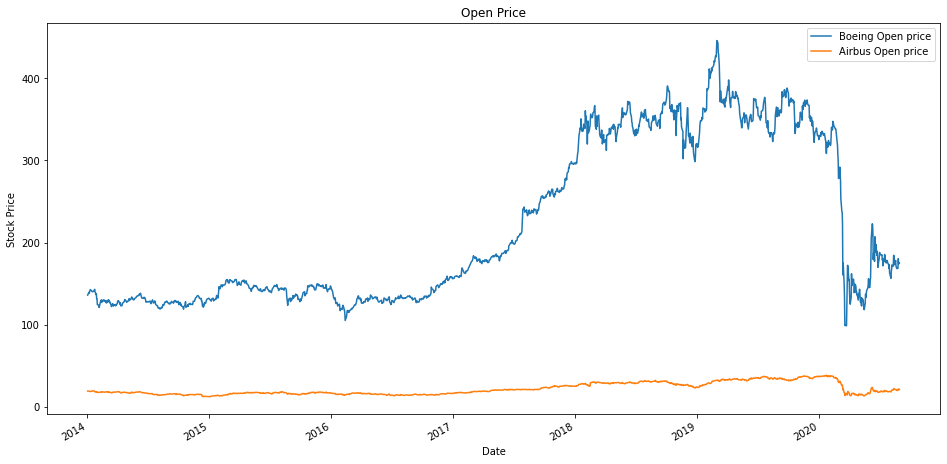

In [25]:
boeing ['Open'].plot(label = 'Boeing Open price', figsize = (16,8))
airbus ['Open'].plot(label = 'Airbus Open price')
plot.title('Open Price')
plot.ylabel('Stock Price')
plot.legend()
plot.show()

In [26]:
boeing.iloc[[boeing['Volume'].argmax()]]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-11,192.179993,166.009995,179.350006,170.0,103212800.0,170.0


In [27]:
airbus.iloc[[airbus['Volume'].argmax()]]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-12,12.72,12.5,12.7,12.65,7317000.0,11.154614


In [28]:
boeing['Total Traded'] = boeing['Open'] * boeing['Volume']
airbus['Total Traded'] = airbus['Open'] * airbus['Volume']

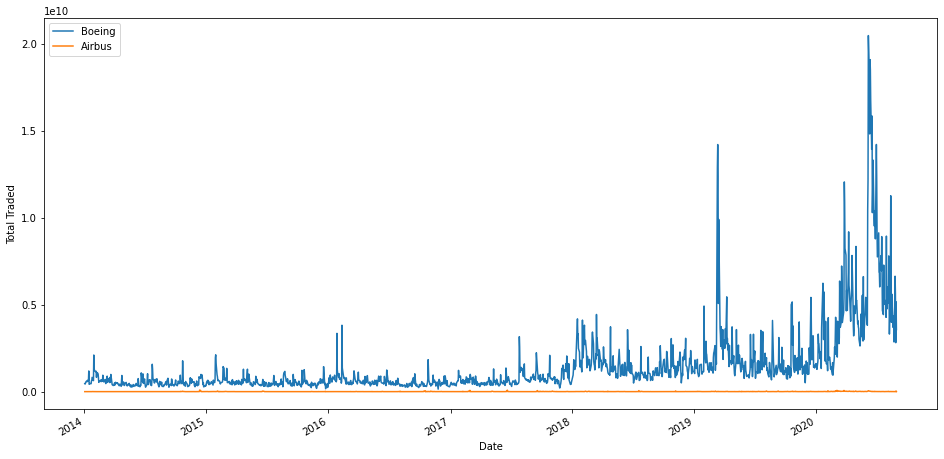

In [29]:
boeing['Total Traded'].plot(label = 'Boeing', figsize = (16,8))
airbus['Total Traded'].plot(label = 'Airbus')
plot.ylabel('Total Traded')
plot.legend()

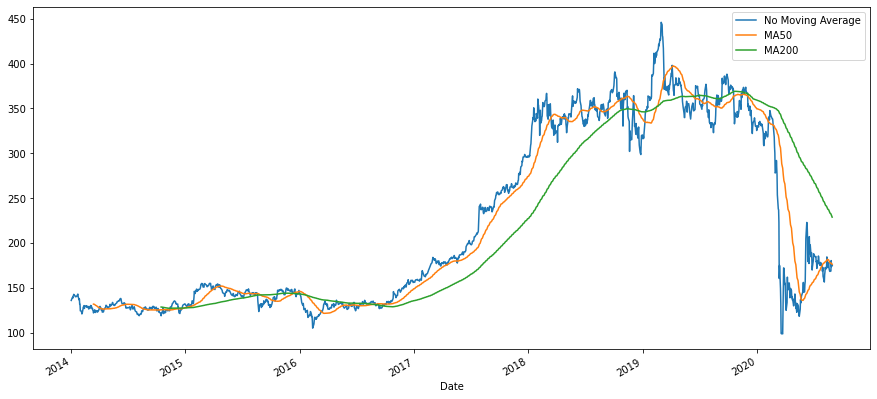

In [30]:
boeing ['Open'].plot(label = 'No Moving Average' , figsize = (15,7))
boeing ['MA50'] = boeing ['Open'].rolling(50).mean()
boeing ['MA50'].plot(label = 'MA50')
boeing ['MA200'] = boeing ['Open'].rolling(200).mean()
boeing ['MA200'].plot(label = 'MA200')
plot.legend()

In [31]:
from pandas.plotting import scatter_matrix

In [32]:
aerospace_comp = pd.concat([boeing['Open'], airbus['Open']], axis = 1)
aerospace_comp.columns = ['boeing Open', 'airbus Open']

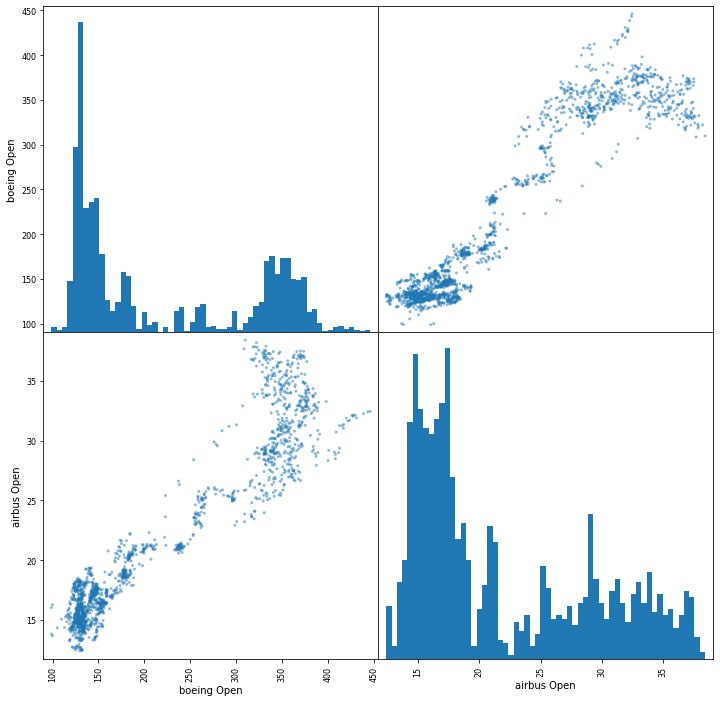

In [33]:
scatter_matrix(aerospace_comp, figsize = (12,12), hist_kwds = {'bins':60});

In [34]:
boeing['returns'] = boeing ['Close'].pct_change(1)
airbus['returns'] = airbus ['Close'].pct_change(1)


In [35]:
boeing.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA200,returns
Date,,,,,,,,,,
2014-01-02,137.250000,135.509995,136.009995,136.669998,3366700.0,115.912590,4.579048e+08,NaN,NaN,NaN
2014-01-03,138.500000,137.050003,137.059998,137.619995,3177400.0,116.718285,4.354944e+08,NaN,NaN,0.006951
2014-01-06,139.759995,137.800003,139.399994,138.410004,4196500.0,117.388313,5.849921e+08,NaN,NaN,0.005741
2014-01-07,141.100006,138.500000,138.580002,140.509995,4238500.0,119.169350,5.873713e+08,NaN,NaN,0.015172
2014-01-08,141.399994,139.360001,140.690002,140.820007,4236100.0,119.432281,5.959769e+08,NaN,NaN,0.002206


In [36]:
airbus.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns
Date,,,,,,,,
2014-01-02,19.330000,19.200001,19.240000,19.309999,48300.0,16.786625,9.292920e+05,NaN
2014-01-03,19.250000,19.080000,19.250000,19.080000,37700.0,16.586683,7.257250e+05,-0.011911
2014-01-06,19.100000,18.850000,19.070000,18.879999,55000.0,16.412817,1.048850e+06,-0.010482
2014-01-07,19.070000,18.830000,18.860001,19.000000,144700.0,16.517136,2.729042e+06,0.006356
2014-01-08,18.799999,18.650000,18.799999,18.750000,65100.0,16.299807,1.223880e+06,-0.013158


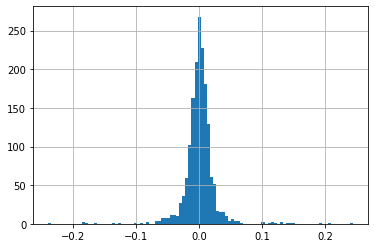

In [37]:
boeing['returns'].hist(bins=100)

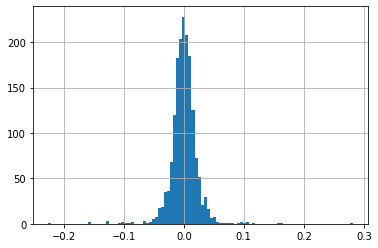

In [38]:
airbus['returns'].hist(bins=100)

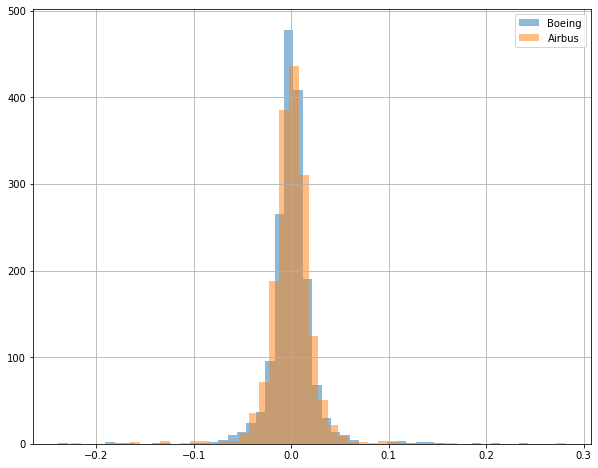

In [39]:
boeing['returns'].hist(bins=50, label = 'Boeing', figsize = (10,8), alpha=0.5)
airbus['returns'].hist(bins=50, label = 'Airbus', figsize = (10,8), alpha=0.5)
plot.legend();

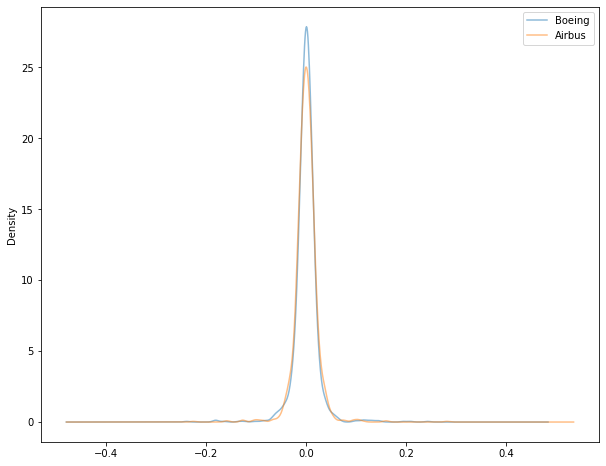

In [40]:
boeing['returns'].plot(kind='kde', label = 'Boeing', figsize = (10,8), alpha=0.5)
airbus['returns'].plot(kind='kde', label = 'Airbus', figsize = (10,8), alpha=0.5 )
plot.legend();

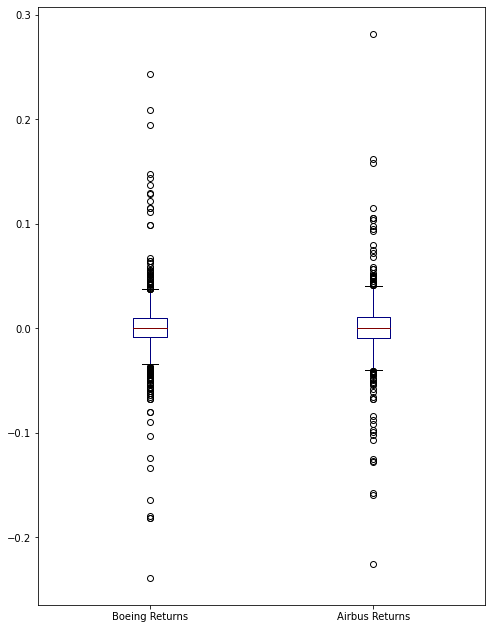

In [41]:
box_df = pd.concat([boeing['returns'], airbus['returns']], axis=1)
box_df.columns = ['Boeing Returns', 'Airbus Returns']
box_df.plot(kind='box', figsize = (8,11), colormap='jet');

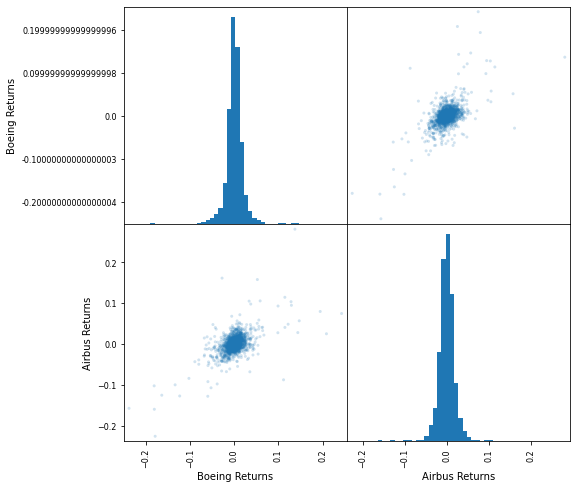

In [42]:
scatter_matrix(box_df, figsize=(8,8), alpha=0.2, hist_kwds={'bins':50});

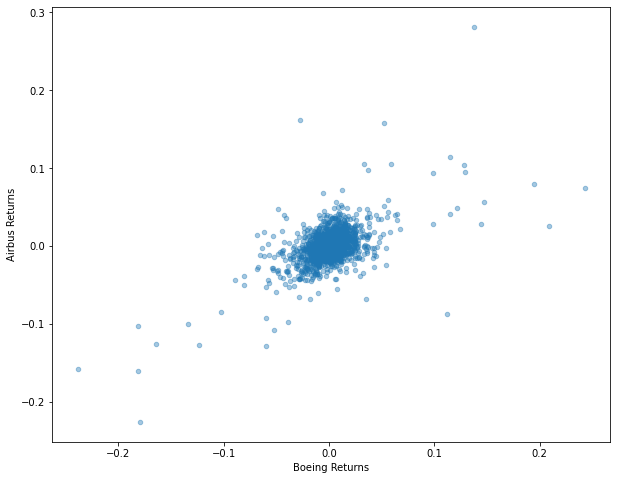

In [43]:
box_df.plot(kind='scatter', x='Boeing Returns', y='Airbus Returns', alpha=0.4, figsize=(10,8));

In [44]:
boeing['Cumulative Return'] = (1+boeing['returns']).cumprod()
airbus['Cumulative Return'] = (1+boeing['returns']).cumprod()

In [45]:
boeing.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA200,returns,Cumulative Return
Date,,,,,,,,,,,
2014-01-02,137.250000,135.509995,136.009995,136.669998,3366700.0,115.912590,4.579048e+08,NaN,NaN,NaN,NaN
2014-01-03,138.500000,137.050003,137.059998,137.619995,3177400.0,116.718285,4.354944e+08,NaN,NaN,0.006951,1.006951
2014-01-06,139.759995,137.800003,139.399994,138.410004,4196500.0,117.388313,5.849921e+08,NaN,NaN,0.005741,1.012731
2014-01-07,141.100006,138.500000,138.580002,140.509995,4238500.0,119.169350,5.873713e+08,NaN,NaN,0.015172,1.028097
2014-01-08,141.399994,139.360001,140.690002,140.820007,4236100.0,119.432281,5.959769e+08,NaN,NaN,0.002206,1.030365


In [46]:
airbus.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns,Cumulative Return
Date,,,,,,,,,
2014-01-02,19.330000,19.200001,19.240000,19.309999,48300.0,16.786625,9.292920e+05,NaN,NaN
2014-01-03,19.250000,19.080000,19.250000,19.080000,37700.0,16.586683,7.257250e+05,-0.011911,1.006951
2014-01-06,19.100000,18.850000,19.070000,18.879999,55000.0,16.412817,1.048850e+06,-0.010482,1.012731
2014-01-07,19.070000,18.830000,18.860001,19.000000,144700.0,16.517136,2.729042e+06,0.006356,1.028097
2014-01-08,18.799999,18.650000,18.799999,18.750000,65100.0,16.299807,1.223880e+06,-0.013158,1.030365


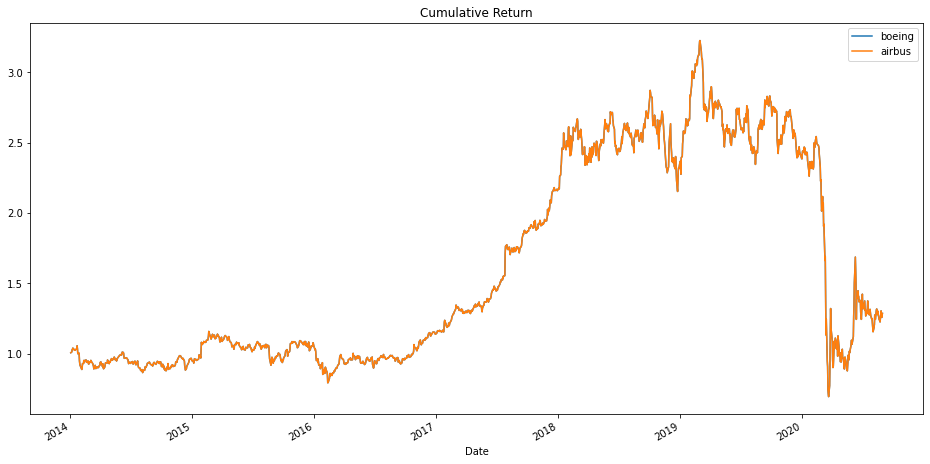

In [52]:
boeing['Cumulative Return'].plot(label='boeing', figsize=(16,8), title = 'Cumulative Return')
airbus['Cumulative Return'].plot(label='airbus')
plot.legend();